# EQUITY FLOAT LOOKBACK

Valuation and Risk of Equity Float Lookback Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 13:18 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



C:\Users\Dominic\anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 7004. The TBB threading layer is disabled.
  warnings.warn(problem)


# Fixed Lookback Option

I create a fixed lookback call and put option

In [3]:
expiry_date = Date(1, 1, 2021)

In [4]:
strike_price = 105.0

In [5]:
option_typeCall = OptionTypes.EUROPEAN_CALL
option_typePut = OptionTypes.EUROPEAN_PUT

In [6]:
lookbackCall = EquityFloatLookbackOption(expiry_date, option_typeCall)
lookbackPut = EquityFloatLookbackOption(expiry_date, option_typePut)

In [7]:
print(lookbackCall)

OBJECT TYPE: EquityFloatLookbackOption
EXPIRY DATE: 01-JAN-2021
OPTION TYPE: OptionTypes.EUROPEAN_CALL


In [8]:
print(lookbackPut)

OBJECT TYPE: EquityFloatLookbackOption
EXPIRY DATE: 01-JAN-2021
OPTION TYPE: OptionTypes.EUROPEAN_PUT


## Valuation

In [9]:
valuation_date = Date(1, 1, 2020)

In [10]:
interest_rate = 0.10

In [11]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [12]:
dividend_yield = 0.0

In [13]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [14]:
volatility = 0.10

In [15]:
num_paths = 2000
num_steps_per_year = 1000

In [16]:
stock_prices = np.linspace(50, 150, 20)

In [17]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackCall.value(valuation_date, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackCall.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, 
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

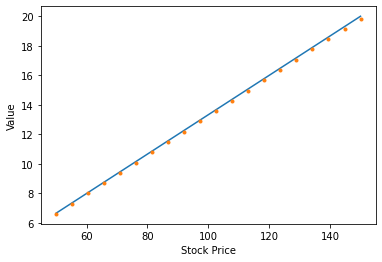

In [18]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [19]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackPut.value(valuation_date, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackPut.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, 
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

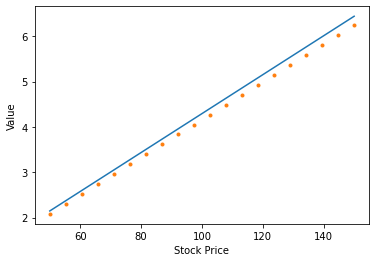

In [20]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane